In [38]:
from main_functions import create_data, generate_synthetic_variables, plot_frequencies, plot_correlation_matrix, create_dummy_variables, find_correlations, filter_data_by_value, cramers_v, chi_squared_test

In [39]:
data = create_data()

In [40]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049.0,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799.0,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841.0,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122.0,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171.0,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [41]:
data.job[1]

'3'

In [42]:
rules = [
    # {
    #     'name': 'synthetic_var_1',
    #     'conditions': [
    #         {'col': 'col1', 'values': ['A', 'B']},  # Only OR needed
    #         {'col': 'col2', 'values': ['X']}  # Only OR needed
    #     ],
    #     'operator': 'AND'  # This is still valid for combining conditions
    # },
    # {
    #     'name': 'synthetic_var_2',
    #     'conditions': [
    #         {'col': 'col2', 'values': ['Y']},  # Only OR needed
    #         {'col': 'col3', 'values': ['Yes']}  # Only OR needed
    #     ],
    #     'operator': 'OR'  # This is still valid for combining conditions
    # },

    # {
    #     'name': 'job__credit_history__class1',
    #     'conditions': [
    #         {'col': 'job', 'values': ['3', '4']},
    #         {'col': 'credit_history', 'values': ['2', '3', '4']}
    #     ],
    #     'operator': 'AND'
    # },
    {
        'name': 'job__credit_history__class2', ##Low quality jobs and good credit history
        'conditions': [
            {'col': 'job', 'values': ['1', '2']},
            {'col': 'credit_history', 'values': ['2', '3', '4']}
        ],
        'operator': 'AND'
    },
    {
        'name': 'status__class1', #Has or not a checking accountx
        'conditions': [
            {'col': 'status', 'values': ['2', '3', '4']}
        ],
        'operator': 'AND'
    },
    # {
    #     'name': 'status__job__class1',
    #     'conditions': [
    #         {'col': 'job', 'values': ['1', '2']},
    #         {'col': 'status', 'values': ['2', '3', '4']}
    #     ],
    #     'operator': 'AND'
    # },
    {
        'name': 'status__job__class2', ## High quality jobs and has checking account
        'conditions': [
            {'col': 'job', 'values': ['3', '4']},
            {'col': 'status', 'values': ['2', '3', '4']}
        ],
        'operator': 'AND'
    },
    {
        'name': 'installment_rate__job__class1', ##High quality jobs and low installment rate
        'conditions': [
            {'col': 'installment_rate', 'values': ['1', '2']},
            {'col': 'job', 'values': ['3', '4']},

        ],
        'operator': 'AND'
    },
    {
        'name': 'savings__installment_rate__class1', ##High savings and low installment rate
        'conditions': [
            {'col': 'savings', 'values': ['3', '4', '5']},
            {'col': 'installment_rate', 'values': ['1', '2']},
        ],
        'operator': 'AND'
    },
    {
        'name': 'savings__installment_rate__job__class1', ##High savings and low installment rate and high quality jobs
        'conditions': [
            {'col': 'savings', 'values': ['3', '4', '5']},
            {'col': 'installment_rate', 'values': ['1', '2']},
            {'col': 'job', 'values': ['3', '4']},
        ],
        'operator': 'AND'
    },
    {
        'name': 'employment_duration__installment_rate__class1', ##Low employment duration and low installment rate
        'conditions': [
            {'col': 'employment_duration', 'values': ['1', '2']},
            {'col': 'installment_rate', 'values': ['1', '2']},

        ],
        'operator': 'AND'
    },
]

synthetic_df = generate_synthetic_variables(data, rules)

In [43]:
synthetic_df.describe()

,job__credit_history__class2,status__class1,status__job__class2,installment_rate__job__class1,savings__installment_rate__class1,savings__installment_rate__job__class1,employment_duration__installment_rate__class1
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.199000,0.726000,0.569000,0.271000,0.105000,0.074000,0.094000
std,0.399448,0.446232,0.495464,0.444699,0.306707,0.261902,0.291975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
synthetic_df.job__credit_history__class2.value_counts()

0    801
1    199
Name: job__credit_history__class2, dtype: int64

In [45]:
synthetic_df.status__class1.value_counts()

1    726
0    274
Name: status__class1, dtype: int64

In [46]:
synthetic_df.status__job__class2.value_counts()

1    569
0    431
Name: status__job__class2, dtype: int64

In [47]:
synthetic_df.installment_rate__job__class1.value_counts()

0    729
1    271
Name: installment_rate__job__class1, dtype: int64

In [48]:
synthetic_df.savings__installment_rate__class1.value_counts()

0    895
1    105
Name: savings__installment_rate__class1, dtype: int64

In [49]:
synthetic_df.savings__installment_rate__job__class1.value_counts()

0    926
1     74
Name: savings__installment_rate__job__class1, dtype: int64

In [50]:
synthetic_df.employment_duration__installment_rate__class1.value_counts()

0    906
1     94
Name: employment_duration__installment_rate__class1, dtype: int64

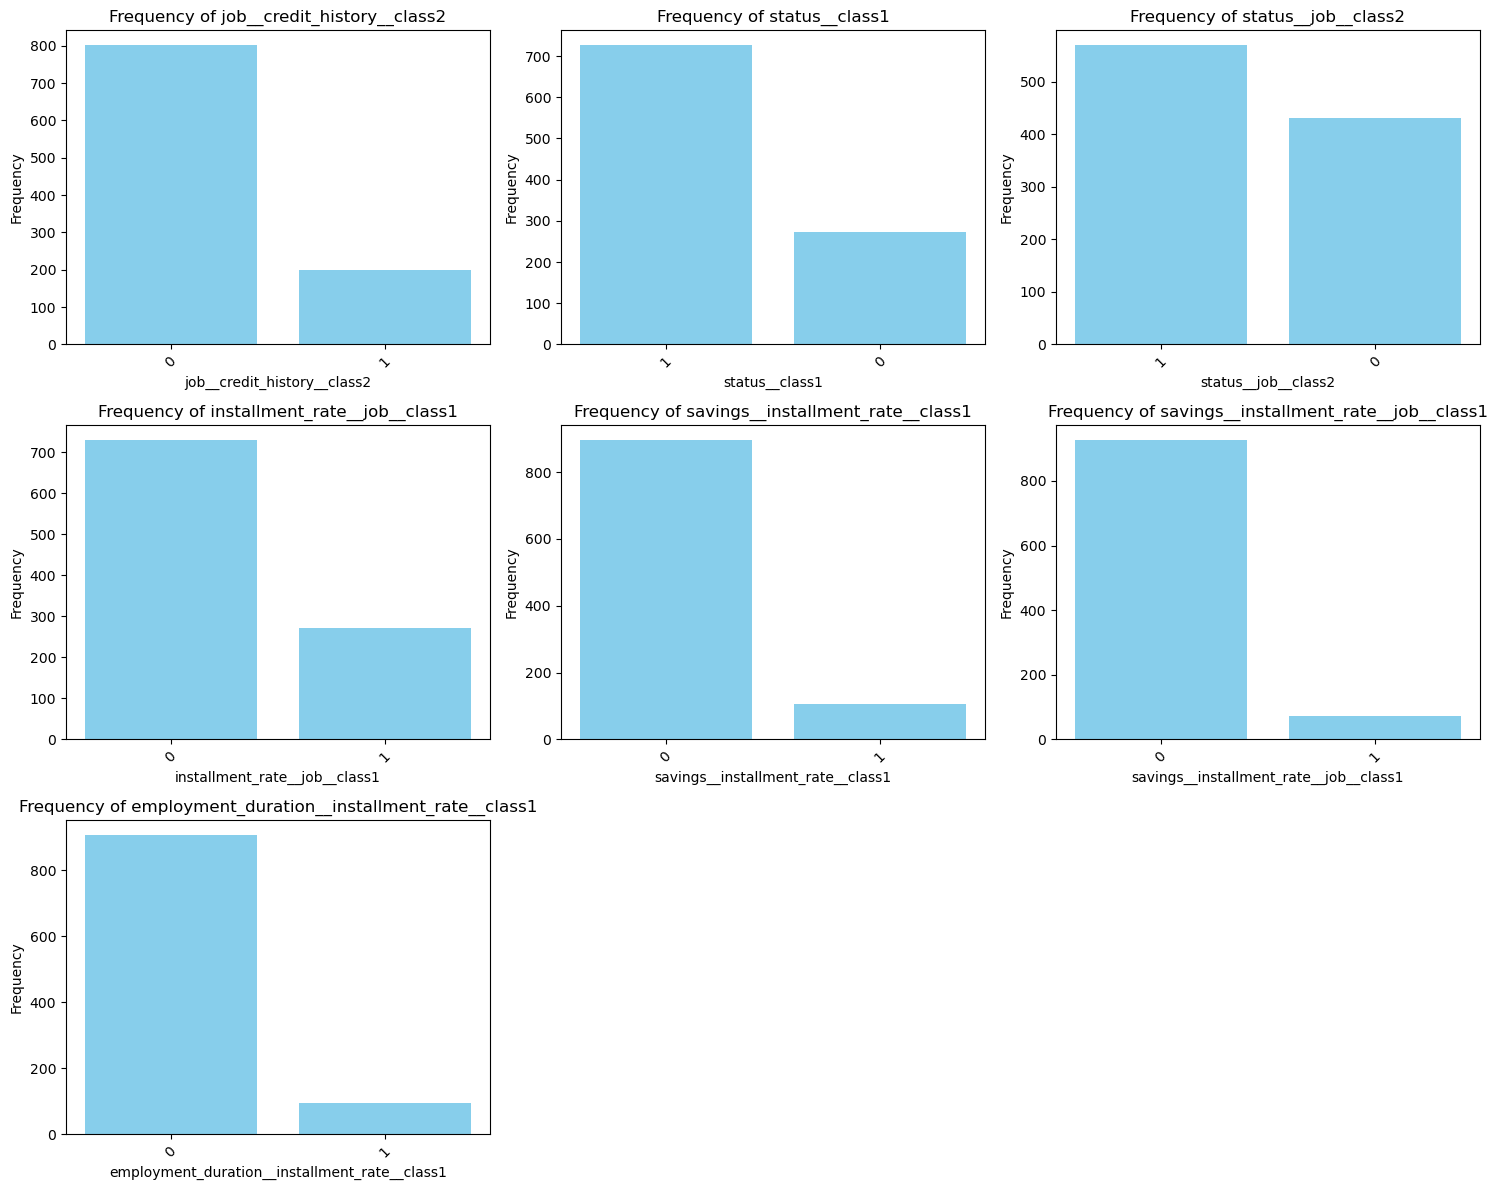

In [51]:
plot_frequencies(synthetic_df, synthetic_df.columns)

In [52]:
data.corr()


/var/folders/l6/bfk83gm94_x23ld0qfdlhyhh0000gs/T/ipykernel_80462/1185648202.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,duration,amount,age
duration,1.000000,0.624988,-0.037550
amount,0.624988,1.000000,0.032273
age,-0.037550,0.032273,1.000000


In [53]:
# import pandas_profiling
# from pandas_profiling.utils.cache import cache_file
# from main_functions import merge_two_subsets

# report = data.profile_report(sort=None, html={'style':{'full_width':True}})
# synthetic_df.profile_report(sort=None, html={'style':{'full_width':True}})
# fullset = merge_two_subsets(data, synthetic_df, 1, False)
# fullset.profile_report(sort=None, html={'style':{'full_width':True}})


/Users/victor.lezama/Desktop/DataSciencePortfolio/south-german-credit/main_functions.py:204: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = currDf.corr()


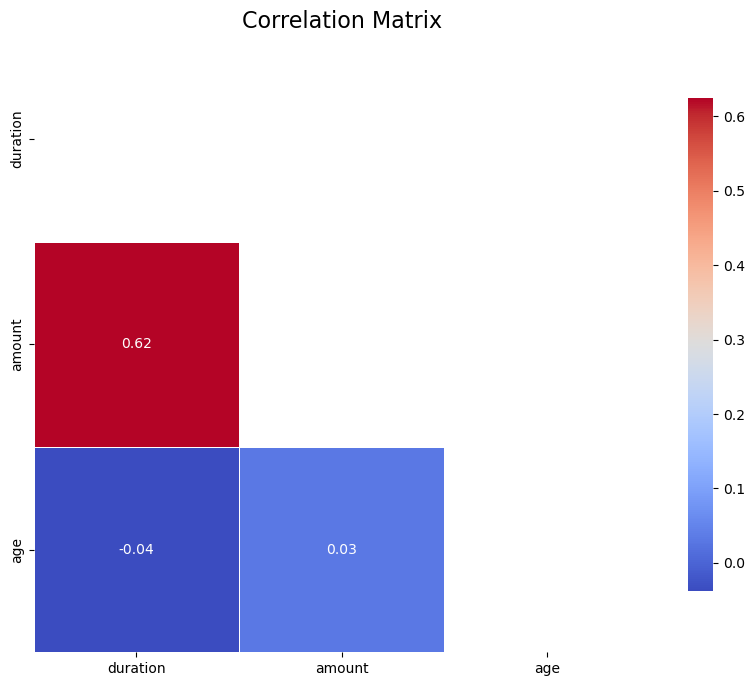

In [54]:
corr_results = plot_correlation_matrix(data, True, 0.5)

In [55]:
data.corr()

/var/folders/l6/bfk83gm94_x23ld0qfdlhyhh0000gs/T/ipykernel_80462/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,duration,amount,age
duration,1.000000,0.624988,-0.037550
amount,0.624988,1.000000,0.032273
age,-0.037550,0.032273,1.000000


In [56]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049.0,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799.0,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841.0,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122.0,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171.0,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [58]:
dummy_job_data = create_dummy_variables(data, 'job', 'credit_risk')
chi_squared_test(dummy_job_data, 'credit_risk_1')

{'job_1': {'chi2_statistic': 0.0,
  'p_value': 1.0,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[293.4,   6.6],
         [684.6,  15.4]])},
 'job_2': {'chi2_statistic': 0.36458333333333326,
  'p_value': 0.5459717226765591,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[240.,  60.],
         [560., 140.]])},
 'job_3': {'chi2_statistic': 0.12767869910727053,
  'p_value': 0.7208510894485458,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[111., 189.],
         [259., 441.]])},
 'job_4': {'chi2_statistic': 1.4052029897100318,
  'p_value': 0.23585435941881344,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[255.6,  44.4],
         [596.4, 103.6]])}}

No se encontraron resultados significativos

filter_data_by_value(data, 'job', 'credit_risk', )

In [59]:
dummy_purpose_data = create_dummy_variables(data, 'purpose', 'credit_risk')
chi_squared_test(dummy_purpose_data, 'credit_risk_1')

{'purpose_0': {'chi2_statistic': 8.89689075067665,
  'p_value': 0.002856566553748428,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[229.8,  70.2],
         [536.2, 163.8]])},
 'purpose_1': {'chi2_statistic': 9.25466353917177,
  'p_value': 0.002348964871210314,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[269.1,  30.9],
         [627.9,  72.1]])},
 'purpose_10': {'chi2_statistic': 0.3253325621746673,
  'p_value': 0.5684204565098252,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[296.4,   3.6],
         [691.6,   8.4]])},
 'purpose_2': {'chi2_statistic': 0.32894113399243696,
  'p_value': 0.5662832529305258,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[245.7,  54.3],
         [573.3, 126.7]])},
 'purpose_3': {'chi2_statistic': 10.918603552532124,
  'p_value': 0.0009520334593322895,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[216.,  84.],
         [504., 196.]])},
 'purpose_4': {'chi2_statistic': 0.0,
  'p_value'

Columnas con relación significativa:

purpose_0

purpose_1

purpose_3

purpose_6

In [60]:
purpose_0_dataset = filter_data_by_value(data, 'purpose', 'credit_risk', '0')
purpose_1_dataset = filter_data_by_value(data, 'purpose', 'credit_risk', '1')
purpose_3_dataset = filter_data_by_value(data, 'purpose', 'credit_risk', '3')
purpose_6_dataset = filter_data_by_value(data, 'purpose', 'credit_risk', '6')

In [61]:
dummy_credit_history_data = create_dummy_variables(data, 'credit_history', 'credit_risk')
chi_squared_test(dummy_credit_history_data, 'credit_risk_1')

{'credit_history_0': {'chi2_statistic': 19.37624007936508,
  'p_value': 1.073341892470815e-05,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[288.,  12.],
         [672.,  28.]])},
 'credit_history_1': {'chi2_statistic': 16.742644181001225,
  'p_value': 4.280790428706077e-05,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[285.3,  14.7],
         [665.7,  34.3]])},
 'credit_history_2': {'chi2_statistic': 1.7252585498269963,
  'p_value': 0.18901755896476705,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[141., 159.],
         [329., 371.]])},
 'credit_history_3': {'chi2_statistic': 0.07179406850459524,
  'p_value': 0.7887423075813524,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[273.6,  26.4],
         [638.4,  61.6]])},
 'credit_history_4': {'chi2_statistic': 32.154138308586035,
  'p_value': 1.42413027988845e-08,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[212.1,  87.9],
         [494.9, 205.1]])}}

In [62]:
credit_history_0_dataset = filter_data_by_value(data, 'credit_history', 'credit_risk', '0')
credit_history_1_dataset = filter_data_by_value(data, 'credit_history', 'credit_risk', '1')
credit_history_4_dataset = filter_data_by_value(data, 'credit_history', 'credit_risk', '4')

In [66]:
dummy_status_data = create_dummy_variables(data, 'status', 'credit_risk')
chi_squared_test(dummy_status_data, 'credit_risk_1')

{'status_1': {'chi2_statistic': 65.47822523270433,
  'p_value': 5.875962249780948e-16,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[217.8,  82.2],
         [508.2, 191.8]])},
 'status_2': {'chi2_statistic': 13.717183942825857,
  'p_value': 0.00021250124875290776,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[219.3,  80.7],
         [511.7, 188.3]])},
 'status_3': {'chi2_statistic': 1.5617298739725922,
  'p_value': 0.21141211312671457,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[281.1,  18.9],
         [655.9,  44.1]])},
 'status_4': {'chi2_statistic': 102.52981425771291,
  'p_value': 4.2492427145380535e-24,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[181.8, 118.2],
         [424.2, 275.8]])}}

In [67]:
status_1_dataset = filter_data_by_value(data, 'status', 'credit_risk', '1')
status_3_dataset = filter_data_by_value(data, 'status', 'credit_risk', '3')
status_4_dataset = filter_data_by_value(data, 'status', 'credit_risk', '4')

In [72]:
dummy_savings_data = create_dummy_variables(data, 'savings', 'credit_risk')
chi_squared_test(dummy_savings_data, 'credit_risk_1')

{'savings_1': {'chi2_statistic': 25.210002126427565,
  'p_value': 5.141485805926421e-07,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[119.1, 180.9],
         [277.9, 422.1]])},
 'savings_2': {'chi2_statistic': 0.34841571354868156,
  'p_value': 0.5550113291454761,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[269.1,  30.9],
         [627.9,  72.1]])},
 'savings_3': {'chi2_statistic': 4.417372308819172,
  'p_value': 0.035574779851583395,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[281.1,  18.9],
         [655.9,  44.1]])},
 'savings_4': {'chi2_statistic': 6.5036431239162305,
  'p_value': 0.010765368497813614,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[285.6,  14.4],
         [666.4,  33.6]])},
 'savings_5': {'chi2_statistic': 15.980986906203112,
  'p_value': 6.398183893417964e-05,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[245.1,  54.9],
         [571.9, 128.1]])}}

In [73]:
savings_1_dataset = filter_data_by_value(data, 'savings', 'credit_risk', '1')
savings_3_dataset = filter_data_by_value(data, 'savings', 'credit_risk', '3')
savings_4_dataset = filter_data_by_value(data, 'savings', 'credit_risk', '4')
savings_5_dataset = filter_data_by_value(data, 'savings', 'credit_risk', '5')

In [74]:
dummy_personal_status_sex_data = create_dummy_variables(data, 'personal_status_sex', 'credit_risk')
chi_squared_test(dummy_personal_status_sex_data, 'credit_risk_1')

{'personal_status_sex_1': {'chi2_statistic': 2.030075187969925,
  'p_value': 0.1542129779461507,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[285.,  15.],
         [665.,  35.]])},
 'personal_status_sex_2': {'chi2_statistic': 5.348516218081436,
  'p_value': 0.020739913068713305,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[207.,  93.],
         [483., 217.]])},
 'personal_status_sex_3': {'chi2_statistic': 6.159816487799175,
  'p_value': 0.013068476586913557,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[135.6, 164.4],
         [316.4, 383.6]])},
 'personal_status_sex_4': {'chi2_statistic': 0.25138862286918245,
  'p_value': 0.6160989982564875,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[272.4,  27.6],
         [635.6,  64.4]])}}

In [75]:
personal_status_sex_2_dataset = filter_data_by_value(data, 'personal_status_sex', 'credit_risk', '2')
personal_status_sex_3_dataset = filter_data_by_value(data, 'personal_status_sex', 'credit_risk', '3')

In [76]:
dummy_other_debtors_data = create_dummy_variables(data, 'other_debtors', 'credit_risk')
chi_squared_test(dummy_other_debtors_data, 'credit_risk_1')

{'other_debtors_1': {'chi2_statistic': 0.0,
  'p_value': 1.0,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[ 27.9, 272.1],
         [ 65.1, 634.9]])},
 'other_debtors_2': {'chi2_statistic': 3.2748011079097825,
  'p_value': 0.0703514534965371,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[287.7,  12.3],
         [671.3,  28.7]])},
 'other_debtors_3': {'chi2_statistic': 2.5125191264431783,
  'p_value': 0.11294525539005033,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[284.4,  15.6],
         [663.6,  36.4]])}}

Nada significativo

In [78]:
dummy_other_installment_plans_data = create_dummy_variables(data, 'other_installment_plans', 'credit_risk')
chi_squared_test(dummy_other_installment_plans_data, 'credit_risk_1')

{'other_installment_plans_1': {'chi2_statistic': 8.715377125875204,
  'p_value': 0.0031553713868776602,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[258.3,  41.7],
         [602.7,  97.3]])},
 'other_installment_plans_2': {'chi2_statistic': 2.0582366142858195,
  'p_value': 0.15138526991472956,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[285.9,  14.1],
         [667.1,  32.9]])},
 'other_installment_plans_3': {'chi2_statistic': 12.206068657681563,
  'p_value': 0.0004763430798236819,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[ 55.8, 244.2],
         [130.2, 569.8]])}}

In [79]:
other_installment_plans_1_dataset = filter_data_by_value(data, 'other_installment_plans', 'credit_risk', '1')
other_installment_plans_3_dataset = filter_data_by_value(data, 'other_installment_plans', 'credit_risk', '3')

In [80]:
dummy_housing_data = create_dummy_variables(data, 'housing', 'credit_risk')
chi_squared_test(dummy_housing_data, 'credit_risk_1')

{'housing_1': {'chi2_statistic': 8.089071814328515,
  'p_value': 0.004453296372143891,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[246.3,  53.7],
         [574.7, 125.3]])},
 'housing_2': {'chi2_statistic': 17.89270486749478,
  'p_value': 2.3371527415665896e-05,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[ 85.8, 214.2],
         [200.2, 499.8]])},
 'housing_3': {'chi2_statistic': 6.476720734028348,
  'p_value': 0.010929644703597134,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[267.9,  32.1],
         [625.1,  74.9]])}}

Todas las variables fueron significativas. Se postula como candidata a variable predictora

In [81]:
housing_1_dataset = filter_data_by_value(data, 'housing', 'credit_risk', '1')
housing_2_dataset = filter_data_by_value(data, 'housing', 'credit_risk', '2')
housing_3_dataset = filter_data_by_value(data, 'housing', 'credit_risk', '3')

In [82]:
dummy_foreign_worker_data = create_dummy_variables(data, 'foreign_worker', 'credit_risk')
chi_squared_test(dummy_foreign_worker_data, 'credit_risk_1')

{'foreign_worker_1': {'chi2_statistic': 5.821575915033861,
  'p_value': 0.015830754902852885,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[288.9,  11.1],
         [674.1,  25.9]])},
 'foreign_worker_2': {'chi2_statistic': 5.821575915033861,
  'p_value': 0.015830754902852885,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[ 11.1, 288.9],
         [ 25.9, 674.1]])}}

In [83]:
foreign_worker_1_dataset = filter_data_by_value(data, 'foreign_worker', 'credit_risk', '1')
foreign_worker_2_dataset = filter_data_by_value(data, 'foreign_worker', 'credit_risk', '2')

In [84]:
dummy_people_liable_data = create_dummy_variables(data, 'people_liable', 'credit_risk')
chi_squared_test(dummy_people_liable_data, 'credit_risk_1')

{'people_liable_1': {'chi2_statistic': 0.0,
  'p_value': 1.0,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[253.5,  46.5],
         [591.5, 108.5]])},
 'people_liable_2': {'chi2_statistic': 0.0,
  'p_value': 1.0,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[ 46.5, 253.5],
         [108.5, 591.5]])}}

Nada significativo

In [85]:
dummy_number_credits_data = create_dummy_variables(data, 'number_credits', 'credit_risk')
chi_squared_test(dummy_number_credits_data, 'credit_risk_1')

{'number_credits_1': {'chi2_statistic': 1.8890932536864082,
  'p_value': 0.16930422910258336,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[110.1, 189.9],
         [256.9, 443.1]])},
 'number_credits_2': {'chi2_statistic': 1.1740161665199154,
  'p_value': 0.27857756053181204,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[200.1,  99.9],
         [466.9, 233.1]])},
 'number_credits_3': {'chi2_statistic': 0.6316312533243744,
  'p_value': 0.426757590134623,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[291.6,   8.4],
         [680.4,  19.6]])},
 'number_credits_4': {'chi2_statistic': 0.0,
  'p_value': 1.0,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[298.2,   1.8],
         [695.8,   4.2]])}}

Nada significativo

In [86]:
dummy_telephone_data = create_dummy_variables(data, 'telephone', 'credit_risk')
chi_squared_test(dummy_telephone_data, 'credit_risk_1')

{'telephone_1': {'chi2_statistic': 1.1725585310208857,
  'p_value': 0.2788761543035742,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[121.2, 178.8],
         [282.8, 417.2]])},
 'telephone_2': {'chi2_statistic': 1.1725585310208857,
  'p_value': 0.2788761543035742,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[178.8, 121.2],
         [417.2, 282.8]])}}

Nada significativo

In [87]:
data.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [88]:
dummy_employment_duration_data = create_dummy_variables(data, 'employment_duration', 'credit_risk')
chi_squared_test(dummy_employment_duration_data, 'credit_risk_1')

{'employment_duration_1': {'chi2_statistic': 1.2454187259882268,
  'p_value': 0.26442928305768953,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[281.4,  18.6],
         [656.6,  43.4]])},
 'employment_duration_2': {'chi2_statistic': 10.713416363062471,
  'p_value': 0.001063614548121684,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[248.4,  51.6],
         [579.6, 120.4]])},
 'employment_duration_3': {'chi2_statistic': 0.06885326794823035,
  'p_value': 0.7930137954605981,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[198.3, 101.7],
         [462.7, 237.3]])},
 'employment_duration_4': {'chi2_statistic': 5.3439065086389155,
  'p_value': 0.02079482233625889,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[247.8,  52.2],
         [578.2, 121.8]])},
 'employment_duration_5': {'chi2_statistic': 3.2745323473453403,
  'p_value': 0.07036297760169107,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[224.1,  75.9],
         [52

In [89]:
employment_duration_2_dataset = filter_data_by_value(data, 'employment_duration', 'credit_risk', '2')
employment_duration_4_dataset = filter_data_by_value(data, 'employment_duration', 'credit_risk', '4')

In [90]:
dummy_installment_rate_data = create_dummy_variables(data, 'installment_rate', 'credit_risk')
chi_squared_test(dummy_installment_rate_data, 'credit_risk_1')

{'installment_rate_1': {'chi2_statistic': 1.6084558823529396,
  'p_value': 0.20470899333883372,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[259.2,  40.8],
         [604.8,  95.2]])},
 'installment_rate_2': {'chi2_statistic': 1.239539043737446,
  'p_value': 0.2655599098280993,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[230.7,  69.3],
         [538.3, 161.7]])},
 'installment_rate_3': {'chi2_statistic': 0.09210717101099491,
  'p_value': 0.761515223249108,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[252.9,  47.1],
         [590.1, 109.9]])},
 'installment_rate_4': {'chi2_statistic': 4.705889989583612,
  'p_value': 0.03005943434926282,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[157.2, 142.8],
         [366.8, 333.2]])}}

In [91]:
installment_rate_4_dataset = filter_data_by_value(data, 'installment_rate', 'credit_risk', '4')


In [92]:
dummy_present_residence_data = create_dummy_variables(data, 'present_residence', 'credit_risk')
chi_squared_test(dummy_present_residence_data, 'credit_risk_1')

{'present_residence_1': {'chi2_statistic': 0.2631468148709528,
  'p_value': 0.6079664465429023,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[261.,  39.],
         [609.,  91.]])},
 'present_residence_2': {'chi2_statistic': 0.3755706171065373,
  'p_value': 0.5399833524610413,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[207.6,  92.4],
         [484.4, 215.6]])},
 'present_residence_3': {'chi2_statistic': 0.05407884018914103,
  'p_value': 0.8161119629321525,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[255.3,  44.7],
         [595.7, 104.3]])},
 'present_residence_4': {'chi2_statistic': 0.0,
  'p_value': 1.0,
  'degrees_of_freedom': 1,
  'expected_frequencies': array([[176.1, 123.9],
         [410.9, 289.1]])}}

Nada significativo